In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files


In [2]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Save the trained model
model.save("mnist_model.h5")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8803 - loss: 0.4300 - val_accuracy: 0.9603 - val_loss: 0.1365
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9657 - loss: 0.1187 - val_accuracy: 0.9718 - val_loss: 0.0953
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9759 - loss: 0.0809 - val_accuracy: 0.9747 - val_loss: 0.0870
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9835 - loss: 0.0573 - val_accuracy: 0.9745 - val_loss: 0.0831
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9862 - loss: 0.0459 - val_accuracy: 0.9735 - val_loss: 0.0807


In [8]:
# Function to predict digit from an uploaded image
def predict_digit(image_path="C:/Users/Piyush D/Downloads/3.jpg"):
    model = keras.models.load_model("mnist_model.h5")
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = np.expand_dims(img, axis=-1)  # Add channel dimension


    img = cv2.resize(img, (28, 28))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = np.expand_dims(img, axis=-1)  # Add channel dimension


In [12]:
def predict_digit(image_path="C:/Users/Piyush D/Downloads/3.jpg"):
    model = keras.models.load_model("mnist_model.h5")
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize to MNIST input size
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = np.expand_dims(img, axis=-1)  # Add channel dimension

    # Removed the redundant resize operation
    # The image is already resized and preprocessed above

    prediction = model.predict(img)
    digit = np.argmax(prediction)

    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Digit: {digit}')
    plt.show()
    return digit

Saving 3.jpg to 3 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


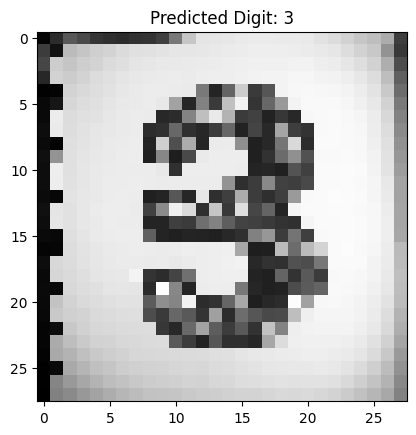

3

In [17]:
# Upload image from PC
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file name
predict_digit(image_path)